## Copy the Data from Google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp -rf "/content/drive/MyDrive/NIH_Dataset_Customised/NIH_Custom.zip" "/content/"

In [5]:
# !unzip NIH_Valid.zip
!unzip NIH_Custom.zip

Streaming output truncated to the last 5000 lines.
 extracting: images/00028533_000.png  
 extracting: images/00010784_000.png  
 extracting: images/00022055_004.png  
 extracting: images/00008943_007.png  
 extracting: images/00027542_010.png  
 extracting: images/00011098_000.png  
 extracting: images/00008728_000.png  
 extracting: images/00007009_000.png  
 extracting: images/00000796_003.png  
 extracting: images/00018254_002.png  
 extracting: images/00015799_027.png  
 extracting: images/00016079_000.png  
 extracting: images/00009242_001.png  
 extracting: images/00016319_001.png  
 extracting: images/00009798_017.png  
 extracting: images/00011460_012.png  
 extracting: images/00000242_001.png  
 extracting: images/00011391_034.png  
 extracting: images/00003227_000.png  
 extracting: images/00009691_017.png  
 extracting: images/00005390_000.png  
 extracting: images/00021277_015.png  
 extracting: images/00030152_009.png  
 extracting: images/00003320_003.png  
 extracting: 

In [4]:
!cp -rf "/content/drive/MyDrive/Theme_1/NIH CC DRD/Data_Entry_2017_v2020.csv" "/content/"

In [5]:
!cp -rf "/content/drive/MyDrive/NIH_Dataset_Customised/NIH_Valid.csv" "/content/"

In [7]:
!ls images/ | wc -l

82020


## Resize all images to 224*224

In [ ]:
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/images1/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            # print(f+e)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize.save(f + e, 'PNG', quality=100)

resize()

In [5]:
!zip -r NIG_Custom_224.zip images

	zip warning: name not matched: images

zip error: Nothing to do! (try: zip -r NIG_Custom_224.zip . -i images)


In [6]:
!cp -rf "/content/NIG_Custom_224.zip" "/content/drive/MyDrive/NIH_Dataset_Customised/" 

cp: cannot stat '/content/NIG_Custom_224.zip': No such file or directory


## Data Analysing

In [15]:
import os
import numpy as np
import pandas as pd

### NIH Dataset Analysis

In [49]:
data_df = pd.read_csv('Data_Entry_2017_v2020.csv')
data_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [10]:
pathology_list = ['Pneumothorax','Pneumonia','Edema','Effusion','Emphysema','Cardiomegaly','Hernia','Nodule','Atelectasis','Pleural_Thickening','Mass','Consolidation','Infiltration','Fibrosis']

data_df['No Findings'] = data_df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
for pathology in pathology_list :
    data_df[pathology] = data_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    

data_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema,Cardiomegaly,Hernia,Nodule,Atelectasis,Pleural_Thickening,Mass,Consolidation,Infiltration,Fibrosis
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


No Findings           60361
Pneumothorax           5302
Pneumonia              1431
Edema                  2303
Effusion              13317
Emphysema              2516
Cardiomegaly           2776
Hernia                  227
Nodule                 6331
Atelectasis           11559
Pleural_Thickening     3385
Mass                   5782
Consolidation          4667
Infiltration          19894
Fibrosis               1686
dtype: int64

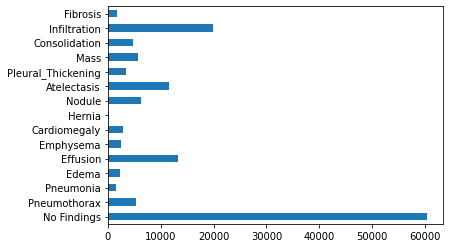

In [11]:
data_df = data_df.drop(list(data_df.iloc[:,1:11].columns.values),axis = 1)
data_df.iloc[:,1:].sum().plot.barh()
data_df.iloc[:,1:].sum()

### NIH Cutomised Data Analysis - contains 5 pathology classes

In [12]:
custom_df = pd.read_csv('NIH_Custom.csv', index_col=0)
custom_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],target_list
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,"[6, 5]"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,"[6, 4]"
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,[0]
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,[0]
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,[0]


In [13]:
custom_df['No Findings'] = custom_df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
for pathology in pathology_list :
    custom_df[pathology] = custom_df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    

custom_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],target_list,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema,Cardiomegaly,Hernia,Nodule,Atelectasis,Pleural_Thickening,Mass,Consolidation,Infiltration,Fibrosis
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,"[6, 5]",0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,"[6, 4]",0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,[0],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,[0],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,[0],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No Findings     60361
Pneumothorax     5302
Pneumonia        1431
Edema            2303
Effusion        13317
Emphysema        2516
dtype: int64

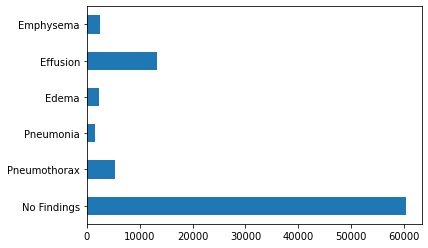

In [14]:
custom_df = valid_df.drop(list(valid_df.iloc[:,1:12].columns.values),axis = 1)
custom_df.iloc[:,1:7].sum().plot.barh()
custom_df.iloc[:,1:7].sum()

## Train:Test Split creation(70:30)

In [16]:
valid_df = pd.read_csv('NIH_Valid.csv', index_col=0)
valid_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],target_list
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,"[6, 5]"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,"[6, 4]"
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,[0]
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,[0]
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,[0]


In [17]:
pathology_list = ['Pneumothorax','Pneumonia','Edema','Effusion','Emphysema','Cardiomegaly','Hernia','Nodule','Atelectasis','Pleural_Thickening','Mass','Consolidation','Infiltration','Fibrosis']

valid_df['No Findings'] = valid_df['Finding Labels'].apply(lambda x: 1.0 if 'No Finding' in x else 0.0)
for pathology in pathology_list :
    valid_df[pathology] = valid_df['Finding Labels'].apply(lambda x: 1.0 if pathology in x else 0.0)
    

valid_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],target_list,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema,Cardiomegaly,Hernia,Nodule,Atelectasis,Pleural_Thickening,Mass,Consolidation,Infiltration,Fibrosis
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,"[6, 5]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,"[6, 4]",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
valid_df = valid_df.drop(list(valid_df.iloc[:,1:3].columns.values),axis = 1)
valid_df.head()

,Image Index,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],target_list,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema,Cardiomegaly,Hernia,Nodule,Atelectasis,Pleural_Thickening,Mass,Consolidation,Infiltration,Fibrosis
1,00000001_001.png,1,58,M,PA,2894,2729,0.143,0.143,"[6, 5]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,1,58,M,PA,2500,2048,0.168,0.168,"[6, 4]",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,2,80,M,PA,2500,2048,0.171,0.171,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,00000005_000.png,5,69,F,PA,2048,2500,0.168,0.168,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,00000005_001.png,5,69,F,AP,2500,2048,0.168,0.168,[0],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
valid_df = valid_df.drop(list(valid_df.iloc[:,2:10].columns.values),axis = 1)
valid_df.head()

,Image Index,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema,Cardiomegaly,Hernia,Nodule,Atelectasis,Pleural_Thickening,Mass,Consolidation,Infiltration,Fibrosis
1,00000001_001.png,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,00000005_000.png,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,00000005_001.png,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
valid_df = valid_df.drop(list(valid_df.iloc[:,8:].columns.values),axis = 1)
valid_df.head()

,Image Index,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema
1,00000001_001.png,1,0.0,0.0,0.0,0.0,0.0,1.0
2,00000001_002.png,1,0.0,0.0,0.0,0.0,1.0,0.0
3,00000002_000.png,2,1.0,0.0,0.0,0.0,0.0,0.0
13,00000005_000.png,5,1.0,0.0,0.0,0.0,0.0,0.0
14,00000005_001.png,5,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
patientIDs=valid_df["Patient ID"].unique().tolist()
msk = np.random.rand(len(patientIDs)) < 0.7
msk

array([ True,  True, False, ...,  True, False, False])

In [27]:
 valid_df["train"] = valid_df["Patient ID"].apply(lambda x: msk[patientIDs.index(x)] == True)

In [32]:
train_df = valid_df[valid_df.train.to_numpy()].reset_index()
val_df = valid_df[~valid_df.train.to_numpy()].reset_index()

In [35]:
train_df = train_df.drop(list(train_df.iloc[:,:1].columns.values),axis = 1)
train_df = train_df.drop(list(train_df.iloc[:,8:].columns.values),axis = 1)
train_df.head()

,Image Index,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema
0,00000001_001.png,1,0.0,0.0,0.0,0.0,0.0,1.0
1,00000001_002.png,1,0.0,0.0,0.0,0.0,1.0,0.0
2,00000002_000.png,2,1.0,0.0,0.0,0.0,0.0,0.0
3,00000006_000.png,6,1.0,0.0,0.0,0.0,0.0,0.0
4,00000007_000.png,7,1.0,0.0,0.0,0.0,0.0,0.0


In [36]:
val_df = val_df.drop(list(val_df.iloc[:,:1].columns.values),axis = 1)
val_df = val_df.drop(list(val_df.iloc[:,8:].columns.values),axis = 1)
val_df.head()

,Image Index,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema
0,00000005_000.png,5,1.0,0.0,0.0,0.0,0.0,0.0
1,00000005_001.png,5,1.0,0.0,0.0,0.0,0.0,0.0
2,00000005_002.png,5,1.0,0.0,0.0,0.0,0.0,0.0
3,00000005_003.png,5,1.0,0.0,0.0,0.0,0.0,0.0
4,00000005_004.png,5,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
train_df.describe()

,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema
count,57580.000000,57580.000000,57580.000000,57580.000000,57580.000000,57580.000000,57580.000000
mean,14251.193852,0.736158,0.065179,0.017332,0.028725,0.162747,0.029767
std,8418.491133,0.440718,0.246843,0.130508,0.167035,0.369138,0.169946
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13834.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20629.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30803.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
train_df.to_csv('train_set.csv', index=False)

In [39]:
val_df.to_csv('val_set.csv', index=False)

No Findings     42388.0
Pneumothorax     3753.0
Pneumonia         998.0
Edema            1654.0
Effusion         9371.0
Emphysema        1714.0
dtype: float64

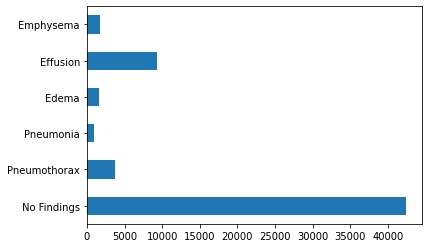

In [40]:
train_df.iloc[:,2:8].sum().plot.barh()
train_df.iloc[:,2:8].sum()

No Findings     17973.0
Pneumothorax     1549.0
Pneumonia         433.0
Edema             649.0
Effusion         3946.0
Emphysema         802.0
dtype: float64

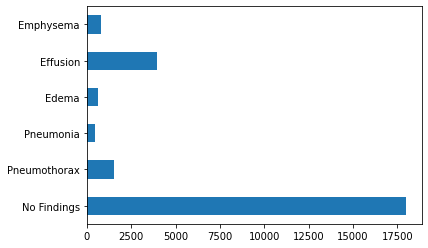

In [41]:
val_df.iloc[:,2:8].sum().plot.barh()
val_df.iloc[:,2:8].sum()

## Validate:Test Split creation(2:1)

In [ ]:
!cp -rf "/content/val_set.csv" "/content/drive/MyDrive/NIH_Dataset_Customised/" 
!cp -rf "/content/test_set.csv" "/content/drive/MyDrive/NIH_Dataset_Customised/"

In [13]:
data_df = pd.read_csv("val_set.csv", index_col=0)
data_df.head()

,Patient ID,No Findings,Pneumothorax,Pneumonia,Edema,Effusion,Emphysema
Image Index,,,,,,,
00000001_001.png,1,0,0,0,0,0,1
00000001_002.png,1,0,0,0,0,1,0
00000008_001.png,8,1,0,0,0,0,0
00000023_000.png,23,1,0,0,0,0,0
00000023_001.png,23,1,0,0,0,0,0


In [15]:
msk = np.random.rand(len(data_df)) < 2/3

valid_df = data_df[msk].reset_index()
test_df = data_df[~msk].reset_index()

In [18]:
valid_df.to_csv('val_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)

No Findings     12010
Pneumothorax      977
Pneumonia         254
Edema             390
Effusion         2439
Emphysema         497
dtype: int64

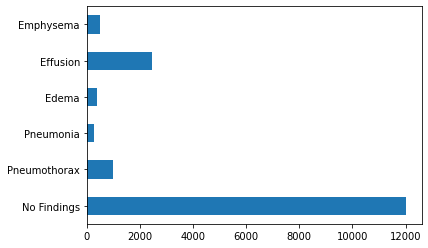

In [21]:
valid_df.iloc[:,2:8].sum().plot.barh()
valid_df.iloc[:,2:8].sum()

No Findings     5971
Pneumothorax     485
Pneumonia        142
Edema            210
Effusion        1214
Emphysema        284
dtype: int64

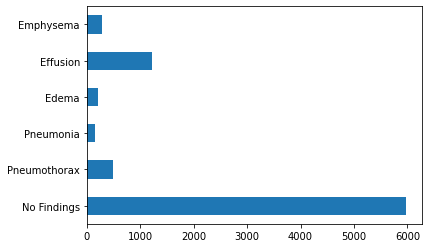

In [22]:
test_df.iloc[:,2:8].sum().plot.barh()
test_df.iloc[:,2:8].sum()